<a href="https://colab.research.google.com/github/yuji-sgs/Practical-Statistics-for-Data-Scientists/blob/main/Chapter1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1章：探索的データ分析

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wquantiles

In [3]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [4]:
dir = Path('drive/MyDrive/Colab Notebooks/技術書/データサイエンスのための統計学入門/data')

In [5]:
AIRLINE_STATS_CSV = dir / 'airline_stats.csv'
KC_TAX_CSV = dir / 'kc_tax.csv.gz'
LC_LOANS_CSV = dir / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = dir / 'dfw_airline.csv'
SP500_DATA_CSV = dir / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = dir / 'sp500_sectors.csv'
STATE_CSV = dir / 'state.csv'

# 所在地の推定
## 1-3 の推定

In [6]:
# 表1-2
state = pd.read_csv(STATE_CSV)
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


In [7]:
# 人口の平均
print(state['Population'].mean())

# 人口のトリム平均（人口の最も多い州と少ない州の両端それぞれ10%取り除く）
print(trim_mean(state['Population'], 0.1))

# 人口の中央値
print(state['Population'].median())

6162876.3
4783697.125
4436369.5


In [8]:
# 殺人率の平均
print(state['Murder.Rate'].mean())

# 殺人率の加重平均（重みは人口）
print(np.average(state['Murder.Rate'], weights = state['Population']))

# 殺人率の加重中央値（重みは人口）
print(wquantiles.median(state['Murder.Rate'], weights = state['Population']))

4.066
4.445833981123393
4.4


## 1-4 散らばりの推定
メモ：中央絶対誤差<=平均絶対誤差<=標準偏差

In [12]:
# 標準偏差
print(state['Population'].std())

#　四分位範囲（IQR）
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

# 中央絶対偏差
print(robust.scale.mad(state['Population']))

6848235.347401142
4847308.0
3849876.1459979336


## 1-5 データ分布の探索

In [14]:
# パーセンタイル（5%, 25%, 50%, 75%, 95%）
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

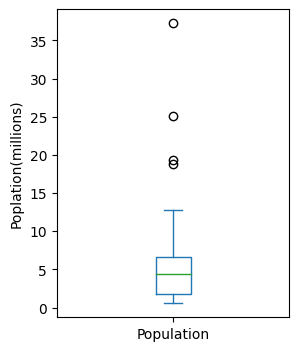

In [20]:
# 箱ひげ図
ax = (state['Population'] / 1_000_000).plot.box(figsize = (3, 4))
ax.set_ylabel('Poplation(millions)')
plt.tight_layout()
plt.show()

In [26]:
# 度数分布表
binnedPopulation = pd.cut(state['Population'], 10)
df_binned_population = pd.DataFrame(binnedPopulation.value_counts())
df_binned_population = df_binned_population.reset_index()
df_binned_population.columns = ['Population Range', 'Count']
df_binned_population

,Population Range,Count
0,"(526935.67, 4232659.0]",24
1,"(4232659.0, 7901692.0]",14
2,"(7901692.0, 11570725.0]",6
3,"(11570725.0, 15239758.0]",2
4,"(15239758.0, 18908791.0]",1
5,"(18908791.0, 22577824.0]",1
6,"(22577824.0, 26246857.0]",1
7,"(33584923.0, 37253956.0]",1
8,"(26246857.0, 29915890.0]",0
9,"(29915890.0, 33584923.0]",0


In [29]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })

groups = pd.DataFrame(groups)
groups.columns = ['Population Range', 'Count', 'States']
groups

,Population Range,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


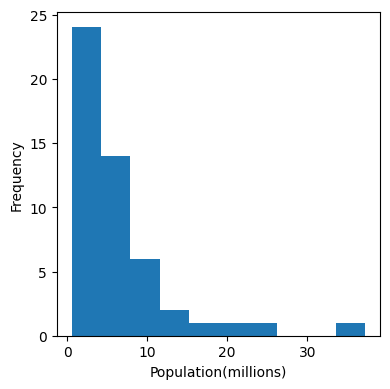

In [33]:
# ヒストグラム
ax = (state['Population'] / 1_000_000).plot.hist(figsize = (4, 4))
ax.set_xlabel('Population(millions)')
plt.tight_layout()
plt.show()

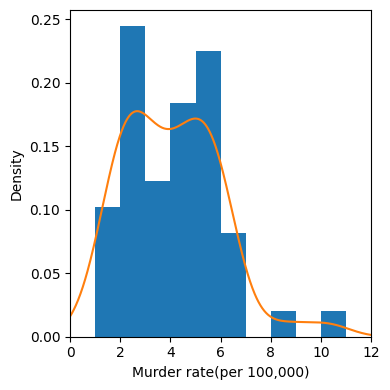

In [35]:
# 密度プロット
ax = state['Murder.Rate'].plot.hist(density = True, xlim = [0, 12], bins = range(1, 12), figsize = (4, 4))
state['Murder.Rate'].plot.density(ax = ax)
ax.set_xlabel('Murder rate(per 100,000)')
plt.tight_layout()
plt.show()

## 1-6 二値データとカテゴリデータの探索
メモ：統計学者やデータ可視化の専門家は一般に円グラフの利用を避ける（情報量が少ないため）

In [38]:
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
dfw = dfw * 100 / dfw.values.sum()
dfw

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


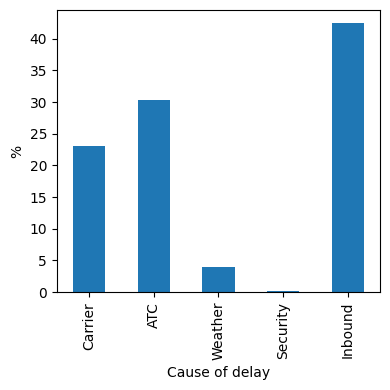

In [41]:
# 横グラフ
ax = dfw.transpose().plot.bar(figsize = (4, 4), legend = False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('%')
plt.tight_layout()
plt.show()